# importing necesary modeules

In [1]:
from sklearn.datasets import load_files
import pandas as pd

In [2]:
Mal_data=pd.read_excel("Malayalam_offensive_data_Training-YT.xlsx")

In [3]:
Mal_data[0:10]

,ID,Tweets,Labels
0,MA_YT001,Thaankal enthaan cheyyarullath?😛,NOT
1,MA_YT002,Ee theetam WCC feminichigalude news aarkk vena...,OFF
2,MA_YT003,fukru nem tiktok oolakale vilich charcha nadat...,OFF
3,MA_YT004,Aashiq abu produce cheytharunnel ee problems u...,NOT
4,MA_YT005,Pennungal oru team aayal ath moonjum ennu epoo...,OFF
5,MA_YT006,@USER po oru Rajithakku parayam ennal oru Renj...,NOT
6,MA_YT007,@USER Ath kazhinju ulla sentence vayik,NOT
7,MA_YT008,@USER TL vere oru ss kandu.,NOT
8,MA_YT009,"@USER penninte peru paranj ,,,,soyam bodham po...",OFF
9,MA_YT010,@USER ninte chanthik ente vaka orayiram umma,OFF


In [4]:
# pip install regex

# importing necesary modeules

In [5]:
import regex
import re
import numpy as np

In [6]:
labels,counts=np.unique(Mal_data['Labels'],return_counts=True)

In [7]:
print(labels,counts)

['NOT' 'OFF'] [2047 1953]


# storing tweets into msg. msg type is pandas series

In [8]:
msg=Mal_data['Tweets']

In [9]:
 type(msg), len(msg)

(pandas.core.series.Series, 4000)

# Removing all emojis from tweets by using the emojis code 

In [10]:
msg_emoj=msg.str.replace(r'[(\U0001F600-\U0001F92F|\U0001F300-\U0001F5FF|\U0001F680-\U0001F6FF|\U0001F190-\U0001F1FF|\U00002702-\U000027B0|\U0001F926-\U0001FA9F|\u200d|\u2640-\u2642|\u2600-\u2B55|\u23cf|\u23e9|\u231a|\ufe0f)]+','')

In [11]:
msg_emoj[10:20]

10               @USER aaano arinjilla..pavam femichees
11    @USER ningaldae oru avastha kashtam.... Sthret...
12    @USER Calicut ilas.. Athe enthina nadana nadan...
13    @USER ne oru kaaryma cheyy mohanlaline ninde a...
14    Nellarayude partner carrot um cucumber um thin...
15    @USER Nee ninte thallaye nattukarkk ookan kodu...
16           Gulfil minaral waterilano meen kazukaan ??
17    @USER thall illathe valarnna ninnod enth oaray...
18                            Businessil ithoke undakum
19    @USER njan oombumeda iniyum oombum ninne pole ...
Name: Tweets, dtype: object

# Removing @USER at the start of each tweet

In [12]:
msg_USER=msg_emoj.str.replace(r"@USER", '')
msg_USER[200:208]

200    kanapadham padhich parayuka aano answers...ee ...
201    Ee myrukal okke tiktokil kidann Enth myro kani...
202    Oroo oombiya videos ayitt eragikolum ... ee ku...
203    eyy Orikkalum Down akaruthu....video cheythond...
204                E patti theetathine kondano vannokane
205          Ivall athrekoo moshamaya kuttiyanooðŸ˜ðŸ˜
206                 Ithine follow cheyunore URL adikanam
207       Epo manasill ayyy real life koothare Annu Ennu
Name: Tweets, dtype: object

# Encoding  ðŸ˜ðŸ˜ & many other symbols to ASCII; so that those r removed from tweets. 
# After removal we can see msg is encoded and started with b'

In [13]:
msg_USER_Encod=msg_USER.str.encode("ascii", "ignore")
msg_USER_Encod[200:208], type(msg_USER_Encod)

(200    b'kanapadham padhich parayuka aano answers...e...
 201    b'Ee myrukal okke tiktokil kidann Enth myro ka...
 202    b'Oroo oombiya videos ayitt eragikolum ... ee ...
 203    b'eyy Orikkalum Down akaruthu....video cheytho...
 204             b'E patti theetathine kondano vannokane'
 205               b'Ivall athrekoo moshamaya kuttiyanoo'
 206              b'Ithine follow cheyunore URL adikanam'
 207    b'Epo manasill ayyy real life koothare Annu Ennu'
 Name: Tweets, dtype: object, pandas.core.series.Series)

# Decoding msg to format where we can see b' is removed 

In [14]:
msg_USER_decod=msg_USER_Encod.str.decode(encoding = 'ASCII')

In [15]:
    msg_USER_decod[0:10]

0                      Thaankal enthaan cheyyarullath?
1    Ee theetam WCC feminichigalude news aarkk vena...
2    fukru nem tiktok oolakale vilich charcha nadat...
3    Aashiq abu produce cheytharunnel ee problems u...
4    Pennungal oru team aayal ath moonjum ennu epoo...
5     po oru Rajithakku parayam ennal oru Renjithin...
6                     Ath kazhinju ulla sentence vayik
7                                TL vere oru ss kandu.
8     penninte peru paranj ,,,,soyam bodham polumil...
9               ninte chanthik ente vaka orayiram umma
Name: Tweets, dtype: object

# Removing digits 

In [16]:
msg_Digit = msg_USER_decod.str.replace(r'[0-9]', ' ')

In [17]:
msg_Digit[229:235]

229      Ee vanathine pokki adikkatha Vittiliri my..... 
230      :   Vttu kalayan ayitt .........{Vali} ond o...
231                    Awooo .bayangara veetukare thanne
232    Bhagavanee ithinum interviewvo ? Negative publ...
233    Pottanmar interview cheyan helen of spartayude...
234    Njn oru subscriber ayirunnu ee video kandappo ...
Name: Tweets, dtype: object

# Removing Special Characters

In [18]:
msg_SpChar = msg_Digit.str.replace(r'[^\w\d\s]', ' ')

In [19]:
msg_SpChar[229:235]

229      Ee vanathine pokki adikkatha Vittiliri my      
230          Vttu kalayan ayitt           Vali  ond o...
231                    Awooo  bayangara veetukare thanne
232    Bhagavanee ithinum interviewvo   Negative publ...
233    Pottanmar interview cheyan helen of spartayude...
234    Njn oru subscriber ayirunnu ee video kandappo ...
Name: Tweets, dtype: object

# Removing  Hyphens & xtra Whitespaces 

In [20]:
msg_Spac = msg_SpChar.str.replace(r'\s+', ' ')

In [21]:
msg_Hyp = msg_Spac.str.replace(r'_','')

In [22]:
msg_Hyp[229:235]

229           Ee vanathine pokki adikkatha Vittiliri my 
230        Vttu kalayan ayitt Vali ond onnu podi avdanu 
231                     Awooo bayangara veetukare thanne
232    Bhagavanee ithinum interviewvo Negative public...
233    Pottanmar interview cheyan helen of spartayude...
234    Njn oru subscriber ayirunnu ee video kandappo ...
Name: Tweets, dtype: object

# storing msg_spec (i.e. processed data) into dataframe Msg_df

In [23]:
Msg_df=pd.DataFrame(msg_Hyp)
Msg_df.columns=['Msg_with_Stopwords']

# Removing Null values 

In [24]:
Msg_df['Msg_with_Stopwords']=Msg_df['Msg_with_Stopwords'].fillna("")

In [25]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Removing Stop words 

In [26]:
stop_words = set(stopwords.words('english'))

In [27]:
Msg_df['Msg_without_Stopwords']=Msg_df['Msg_with_Stopwords'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

# Counting length of each tweet for with stopwords and without stopwords & placing into dataframe : Msg_df

In [28]:
Msg_df['Msg_with_Stopwords_Len'] = [len(x.split()) for x in Msg_df['Msg_with_Stopwords'].tolist()]
Msg_df['Msg_without_Stopwords_Len'] = [len(x.split()) for x in Msg_df['Msg_without_Stopwords'].tolist()]

In [29]:
    Msg_df[228:231]

,Msg_with_Stopwords,Msg_without_Stopwords,Msg_with_Stopwords_Len,Msg_without_Stopwords_Len
228,Aa committed aaya vaikthikku aadhranjalikal,Aa committed aaya vaikthikku aadhranjalikal,5,5
229,Ee vanathine pokki adikkatha Vittiliri my,Ee vanathine pokki adikkatha Vittiliri,6,5
230,Vttu kalayan ayitt Vali ond onnu podi avdanu,Vttu kalayan ayitt Vali ond onnu podi avdanu,8,8


# Counting Vowels and Consonents from each tweet

In [30]:
Msg_df['Vowels'] = Msg_df['Msg_without_Stopwords'].str.lower().str.count(r'[aeiou]')
Msg_df['Consonant'] = Msg_df['Msg_without_Stopwords'].str.lower().str.count(r'[a-z]') - Msg_df['Vowels']

In [31]:
Msg_df

,Msg_with_Stopwords,Msg_without_Stopwords,Msg_with_Stopwords_Len,Msg_without_Stopwords_Len,Vowels,Consonant
0,Thaankal enthaan cheyyarullath,Thaankal enthaan cheyyarullath,3,3,10,18
1,Ee theetam WCC feminichigalude news aarkk vena...,Ee theetam WCC feminichigalude news aarkk vena...,8,8,21,29
2,fukru nem tiktok oolakale vilich charcha nadat...,fukru nem tiktok oolakale vilich charcha nadat...,9,9,24,35
3,Aashiq abu produce cheytharunnel ee problems u...,Aashiq abu produce cheytharunnel ee problems u...,7,7,22,31
4,Pennungal oru team aayal ath moonjum ennu epoo...,Pennungal oru team aayal ath moonjum ennu epoo...,9,9,24,27
...,...,...,...,...,...,...
3995,Eee parasayam thanne thettanu Ella achanmaraya...,Eee parasayam thanne thettanu Ella achanmaraya...,20,20,67,89
3996,Ente bagathum thetundh ee vazhikke veraan paad...,Ente bagathum thetundh ee vazhikke veraan paad...,7,7,21,26
3997,Kuttiye njan kettikolaam swarnam onnum venda e...,Kuttiye njan kettikolaam swarnam onnum venda e...,12,12,29,44
3998,Chumma veettil irunna chakkiye trollanmaarkku ...,Chumma veettil irunna chakkiye trollanmaarkku ...,12,12,37,45


In [32]:
type(Mal_data),type(Msg_df)

(pandas.core.frame.DataFrame, pandas.core.frame.DataFrame)

# Concatinating original dataframe i.e. Mal_data and modified dataframes i.e. Msg_df into final_Data

In [33]:
final_Data=pd.concat([Msg_df, Mal_data], axis=1)

In [34]:
final_Data[21:30]

,Msg_with_Stopwords,Msg_without_Stopwords,Msg_with_Stopwords_Len,Msg_without_Stopwords_Len,Vowels,Consonant,ID,Tweets,Labels
21,ninte thanthakk andikk urappillathath kondall...,ninte thanthakk andikk urappillathath kondalle...,52,49,126,200,MA_YT022,@USER ninte thanthakk andikk urappillathath ko...,OFF
22,ninde thallede number onnu theruo ante pattik...,ninde thallede number onnu theruo ante pattik ...,21,21,52,75,MA_YT023,@USER ninde thallede number onnu theruo...ante...,OFF
23,nintammene kootit ingot va Ennit ne maari nik...,nintammene kootit ingot va Ennit ne maari nikk...,30,30,73,111,MA_YT024,@USER nintammene kootit ingot va. Ennit ne maa...,OFF
24,poda venne amma thooriyapoo therich poyavane,poda venne amma thooriyapoo therich poyavane,6,6,18,21,MA_YT025,@USER poda venne...🥰 amma thooriyapoo therich ...,OFF
25,nee ninte thallayod thanthayod para Closet va...,nee ninte thallayod thanthayod para Closet vaname,7,7,17,26,MA_YT026,@USER nee ninte thallayod thanthayod para Clos...,OFF
26,Edo parvathi padmapriya onnum alla aaa revathi...,Edo parvathi padmapriya onnum alla aaa revathi...,19,19,50,66,MA_YT027,Edo parvathi padmapriya onnum alla aaa revathi...,OFF
27,Nadi mare nadimare ennalathr gusthikar ennu pa...,Nadi mare nadimare ennalathr gusthikar ennu pa...,8,8,22,30,MA_YT028,Nadi mare nadimare ennalathr gusthikar ennu pa...,NOT
28,njan ninne sex cheythotte,njan ninne sex cheythotte,4,4,7,15,MA_YT029,@USER njan ninne sex cheythotte,OFF
29,ithil ipo mindan vendum ntha undaye,ithil ipo mindan vendum ntha undaye,6,6,12,18,MA_YT030,@USER ithil ipo mindan vendum ntha undaye,NOT


# Encoding the labels Offensive as 1 & NOT offensive as 0

In [35]:
final_Data['NLabels']=final_Data['Labels'].apply(lambda x: 1 if x=='OFF' else 0 )

# Dropping the columns Tweets, Labels and ID

In [36]:
final_Data=final_Data.drop(['Tweets', 'Labels', 'ID'], axis=1)

# Showing the Dataframe : final_Data

In [37]:
final_Data

,Msg_with_Stopwords,Msg_without_Stopwords,Msg_with_Stopwords_Len,Msg_without_Stopwords_Len,Vowels,Consonant,NLabels
0,Thaankal enthaan cheyyarullath,Thaankal enthaan cheyyarullath,3,3,10,18,0
1,Ee theetam WCC feminichigalude news aarkk vena...,Ee theetam WCC feminichigalude news aarkk vena...,8,8,21,29,1
2,fukru nem tiktok oolakale vilich charcha nadat...,fukru nem tiktok oolakale vilich charcha nadat...,9,9,24,35,1
3,Aashiq abu produce cheytharunnel ee problems u...,Aashiq abu produce cheytharunnel ee problems u...,7,7,22,31,0
4,Pennungal oru team aayal ath moonjum ennu epoo...,Pennungal oru team aayal ath moonjum ennu epoo...,9,9,24,27,1
...,...,...,...,...,...,...,...
3995,Eee parasayam thanne thettanu Ella achanmaraya...,Eee parasayam thanne thettanu Ella achanmaraya...,20,20,67,89,0
3996,Ente bagathum thetundh ee vazhikke veraan paad...,Ente bagathum thetundh ee vazhikke veraan paad...,7,7,21,26,0
3997,Kuttiye njan kettikolaam swarnam onnum venda e...,Kuttiye njan kettikolaam swarnam onnum venda e...,12,12,29,44,0
3998,Chumma veettil irunna chakkiye trollanmaarkku ...,Chumma veettil irunna chakkiye trollanmaarkku ...,12,12,37,45,0


In [38]:
from nltk import pos_tag, pos_tag_sents 

In [39]:
final_Data['POS'] = pos_tag_sents(final_Data['Msg_with_Stopwords'].apply(word_tokenize).tolist() )

In [40]:
final_Data

,Msg_with_Stopwords,Msg_without_Stopwords,Msg_with_Stopwords_Len,Msg_without_Stopwords_Len,Vowels,Consonant,NLabels,POS
0,Thaankal enthaan cheyyarullath,Thaankal enthaan cheyyarullath,3,3,10,18,0,"[(Thaankal, NNP), (enthaan, VBZ), (cheyyarulla..."
1,Ee theetam WCC feminichigalude news aarkk vena...,Ee theetam WCC feminichigalude news aarkk vena...,8,8,21,29,1,"[(Ee, NNP), (theetam, NN), (WCC, NNP), (femini..."
2,fukru nem tiktok oolakale vilich charcha nadat...,fukru nem tiktok oolakale vilich charcha nadat...,9,9,24,35,1,"[(fukru, NN), (nem, CC), (tiktok, JJ), (oolaka..."
3,Aashiq abu produce cheytharunnel ee problems u...,Aashiq abu produce cheytharunnel ee problems u...,7,7,22,31,0,"[(Aashiq, NNP), (abu, NN), (produce, NN), (che..."
4,Pennungal oru team aayal ath moonjum ennu epoo...,Pennungal oru team aayal ath moonjum ennu epoo...,9,9,24,27,1,"[(Pennungal, NNP), (oru, MD), (team, VB), (aay..."
...,...,...,...,...,...,...,...,...
3995,Eee parasayam thanne thettanu Ella achanmaraya...,Eee parasayam thanne thettanu Ella achanmaraya...,20,20,67,89,0,"[(Eee, NNP), (parasayam, NN), (thanne, NN), (t..."
3996,Ente bagathum thetundh ee vazhikke veraan paad...,Ente bagathum thetundh ee vazhikke veraan paad...,7,7,21,26,0,"[(Ente, NNP), (bagathum, NN), (thetundh, NN), ..."
3997,Kuttiye njan kettikolaam swarnam onnum venda e...,Kuttiye njan kettikolaam swarnam onnum venda e...,12,12,29,44,0,"[(Kuttiye, NNP), (njan, CC), (kettikolaam, NNP..."
3998,Chumma veettil irunna chakkiye trollanmaarkku ...,Chumma veettil irunna chakkiye trollanmaarkku ...,12,12,37,45,0,"[(Chumma, NNP), (veettil, NN), (irunna, NN), (..."


In [82]:
final_Data['Msg_without_Stopwords']

0                          Thaankal enthaan cheyyarullath
1       Ee theetam WCC feminichigalude news aarkk vena...
2       fukru nem tiktok oolakale vilich charcha nadat...
3       Aashiq abu produce cheytharunnel ee problems u...
4       Pennungal oru team aayal ath moonjum ennu epoo...
                              ...                        
3995    Eee parasayam thanne thettanu Ella achanmaraya...
3996    Ente bagathum thetundh ee vazhikke veraan paad...
3997    Kuttiye njan kettikolaam swarnam onnum venda e...
3998    Chumma veettil irunna chakkiye trollanmaarkku ...
3999                   Kalidasan nalla look aayallo kanan
Name: Msg_without_Stopwords, Length: 4000, dtype: object

# splitting the dataset into train=70% & test=30% where X=final_Data.Msg_without_Stopwords & Y=final_Data.NLabels

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(final_Data.Msg_without_Stopwords, final_Data.NLabels,  random_state=40, test_size=0.3)

In [84]:
len(X_train), len(y_train), len(X_test), len(y_test)

(2800, 2800, 1200, 1200)

# Transforming the X_train using TF_IDF Vectorizer where dataset is lowercased; analyzer as word & n-gram as unigram

In [85]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(analyzer='word', lowercase=True , ngram_range=(1, 2))
X=tfidf.fit_transform(X_train) 
Y=y_train
tfidf

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 2), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [86]:
char_tfidf=TfidfVectorizer(analyzer='char', lowercase=True, ngram_range=(1, 5))
X_char=char_tfidf.fit_transform(X_train) 
char_tfidf

TfidfVectorizer(analyzer='char', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 5), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

#  tfidf word  n-gram(1,2) extracted : features  = 38536
#  tfidf char  n-gram(1,5) extracted : features  = 81191


In [87]:
tfidf.get_feature_names()

['aa',
 'aa aala',
 'aa accountinte',
 'aa adikkan',
 'aa adisthanathil',
 'aa al',
 'aa amma',
 'aa bagyavan',
 'aa basheerine',
 'aa bedinadiyale',
 'aa beef',
 'aa casaba',
 'aa chekkanitta',
 'aa cinema',
 'aa collegl',
 'aa coment',
 'aa duplicate',
 'aa ellam',
 'aa film',
 'aa indarw',
 'aa instrument',
 'aa ishtam',
 'aa kannil',
 'aa karumbi',
 'aa kochine',
 'aa kunji',
 'aa kunjine',
 'aa kuttikalude',
 'aa kutty',
 'aa kuttykal',
 'aa kuttykalude',
 'aa manasu',
 'aa mathathile',
 'aa mic',
 'aa monjathiye',
 'aa moonjiya',
 'aa moviyil',
 'aa mugathu',
 'aa naarikal',
 'aa nariye',
 'aa news',
 'aa odukathe',
 'aa oola',
 'aa oru',
 'aa oula',
 'aa paisakku',
 'aa panna',
 'aa parasyathilu',
 'aa pattam',
 'aa pavam',
 'aa pavathinu',
 'aa payyan',
 'aa peedakaneyanu',
 'aa penkuttikk',
 'aa penkuttiye',
 'aa poorathiyude',
 'aa poorinoodu',
 'aa poorinte',
 'aa positionil',
 'aa pretham',
 'aa respect',
 'aa saidil',
 'aa samayathokke',
 'aa samsarashailyil',
 'aa samsara

In [88]:
char_tfidf.get_feature_names()

[' ',
 ' a',
 ' a ',
 ' a c',
 ' a ch',
 ' a e',
 ' a en',
 ' aa',
 ' aa ',
 ' aa a',
 ' aa b',
 ' aa c',
 ' aa d',
 ' aa e',
 ' aa f',
 ' aa i',
 ' aa k',
 ' aa m',
 ' aa n',
 ' aa o',
 ' aa p',
 ' aa r',
 ' aa s',
 ' aa t',
 ' aa v',
 ' aaa',
 ' aaa ',
 ' aaaa',
 ' aaad',
 ' aaah',
 ' aaak',
 ' aaal',
 ' aaan',
 ' aaar',
 ' aaay',
 ' aab',
 ' aaba',
 ' aac',
 ' aach',
 ' aad',
 ' aada',
 ' aadh',
 ' aadi',
 ' aado',
 ' aady',
 ' aag',
 ' aagr',
 ' aagu',
 ' aah',
 ' aah ',
 ' aahd',
 ' aahn',
 ' aai',
 ' aai ',
 ' aail',
 ' aair',
 ' aait',
 ' aaj',
 ' aaja',
 ' aak',
 ' aaka',
 ' aakh',
 ' aaki',
 ' aakk',
 ' aakm',
 ' aakr',
 ' aaks',
 ' aakt',
 ' aaku',
 ' aal',
 ' aal ',
 ' aala',
 ' aald',
 ' aale',
 ' aalk',
 ' aall',
 ' aalo',
 ' aalu',
 ' aam',
 ' aam ',
 ' aan',
 ' aan ',
 ' aana',
 ' aane',
 ' aank',
 ' aann',
 ' aano',
 ' aanp',
 ' aanu',
 ' aap',
 ' aapo',
 ' aar',
 ' aara',
 ' aare',
 ' aari',
 ' aark',
 ' aarn',
 ' aaro',
 ' aarr',
 ' aart',
 ' aaru',
 ' aas',
 ' aasa',

In [45]:
len(tfidf.vocabulary_), len(char_tfidf.vocabulary_), len(tfidf.get_feature_names()), len(char_tfidf.get_feature_names())

(38536, 81191, 38536, 81191)

In [46]:
text=' '.join(final_Data['Msg_without_Stopwords'])
text=text.split()
len(text)

39483

In [47]:
all_words_test = []
for t_sent in text:
    test_tokenize_word = word_tokenize(t_sent)
    for word in test_tokenize_word:
            all_words_test.append(word)

In [48]:
all_words_test

['Thaankal',
 'enthaan',
 'cheyyarullath',
 'Ee',
 'theetam',
 'WCC',
 'feminichigalude',
 'news',
 'aarkk',
 'venam',
 'kondupode',
 'fukru',
 'nem',
 'tiktok',
 'oolakale',
 'vilich',
 'charcha',
 'nadathiyenekka',
 'bedham',
 'aanh',
 'Aashiq',
 'abu',
 'produce',
 'cheytharunnel',
 'ee',
 'problems',
 'undakillarunnu',
 'Pennungal',
 'oru',
 'team',
 'aayal',
 'ath',
 'moonjum',
 'ennu',
 'epoo',
 'mansilayallo',
 'po',
 'oru',
 'Rajithakku',
 'parayam',
 'ennal',
 'oru',
 'Renjithinu',
 'parayan',
 'pattila',
 'Karanam',
 'athu',
 'appol',
 'purushadhipathyam',
 'ayi',
 'pokum',
 'Ath',
 'kazhinju',
 'ulla',
 'sentence',
 'vayik',
 'TL',
 'vere',
 'oru',
 'ss',
 'kandu',
 'penninte',
 'peru',
 'paranj',
 'soyam',
 'bodham',
 'polumillathe',
 'enthakeyo',
 'kaati',
 'kootunna',
 'kudumbathi',
 'pirakaatha',
 'poya',
 'kure',
 'alavalatjikal',
 'und',
 'athil',
 'oru',
 'teams',
 'aanu',
 'ivalumar',
 'neeyum',
 'angne',
 'aano',
 'mole',
 'ninte',
 'chanthik',
 'ente',
 'vaka',
 'o

In [49]:
len(all_words_test)

39484

In [50]:
test_unique_words = set(all_words_test)
print(len(test_unique_words))

x=' '.join(test_unique_words)
len(x)

20316


186388

In [51]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

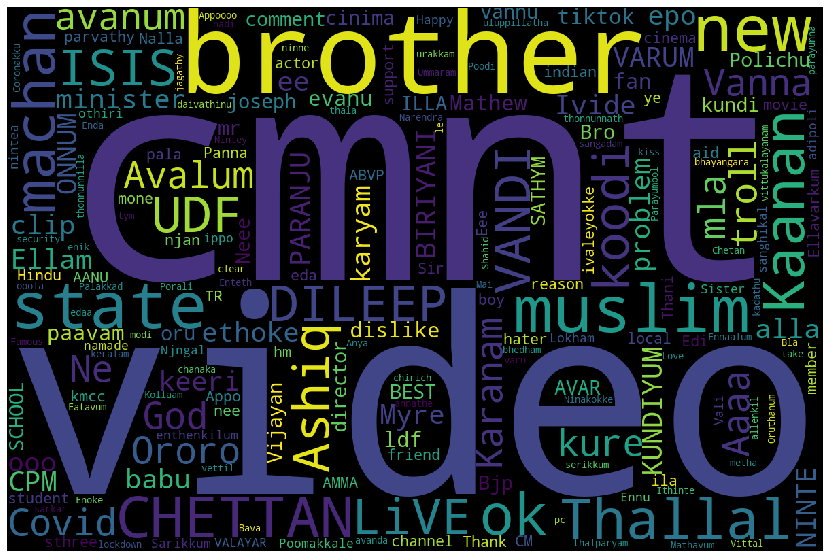

In [52]:
wc=WordCloud(width=1200, height=800).generate(x)
plt.figure(figsize=(15,10))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [67]:
freq_comm=pd.Series(text).value_counts()
# data without stop words length is 20315
len(freq_comm), type(freq_comm)

(20315, pandas.core.series.Series)

In [68]:
f25=freq_comm[:25]
f25

oru       447
URL       295
ee        170
ennu      145
ninte     130
aanu      130
nee       124
thanne    120
onnum     108
okke      106
anu       106
aa         90
illa       89
pole       89
alla       88
poyi       88
ulla       86
njan       85
nalla      79
Oru        76
e          72
athu       72
alle       69
und        67
vere       64
dtype: int64

In [49]:
frare=freq_comm[-25:]
frare

nadakunnavar     1
Mathathinte      1
Chirich          1
feeling          1
nadanu           1
rakshapettalo    1
kooopppe         1
athilullad       1
vyakthyann       1
mariyo           1
vangiya          1
avaravrde        1
usthaad          1
poattumo         1
kariyamolla      1
kelkkunath       1
editing          1
kazikan          1
mudiche          1
bachan           1
kitathe          1
samsarikkaa      1
kittiyoo         1
kooratha         1
adichukoodi      1
dtype: int64

In [50]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [51]:
x=' '.join(text)
len(x)

306206

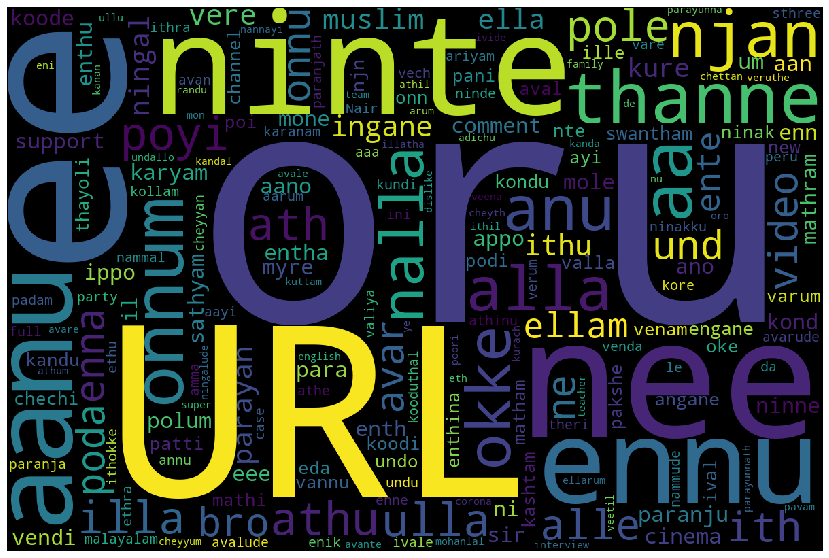

In [52]:
wc=WordCloud(width=1200, height=800).generate(x)
plt.figure(figsize=(15,10))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [53]:
X, X_char

(<2800x38536 sparse matrix of type '<class 'numpy.float64'>'
 	with 51651 stored elements in Compressed Sparse Row format>,
 <2800x81191 sparse matrix of type '<class 'numpy.float64'>'
 	with 762508 stored elements in Compressed Sparse Row format>)

In [54]:
from scipy.sparse import hstack
train=hstack([X,X_char])
train

<2800x119727 sparse matrix of type '<class 'numpy.float64'>'
	with 814159 stored elements in COOrdinate format>

In [55]:
Xt=tfidf.transform(X_test) 
Xt_char=char_tfidf.transform(X_test) 

In [56]:
Xt, Xt_char

(<1200x38536 sparse matrix of type '<class 'numpy.float64'>'
 	with 7105 stored elements in Compressed Sparse Row format>,
 <1200x81191 sparse matrix of type '<class 'numpy.float64'>'
 	with 303257 stored elements in Compressed Sparse Row format>)

In [57]:
traintest=hstack([Xt,Xt_char])
traintest

<1200x119727 sparse matrix of type '<class 'numpy.float64'>'
	with 310362 stored elements in COOrdinate format>

In [58]:
mal_hasoc=pd.read_excel("malayalam_hasoc_tanglish_test_without_labels.xlsx", header=None)
mal_hasoc=mal_hasoc.rename(columns={0:'ID', 1:'Tweets'})
test_Mal_Hasoc=mal_hasoc['Tweets']

test_Mal_Hasoc_word=tfidf.transform(test_Mal_Hasoc)
test_Mal_Hasoc_char=char_tfidf.transform(test_Mal_Hasoc)
test_Mal_Hasoc_word_char=hstack([test_Mal_Hasoc_word,test_Mal_Hasoc_char])

In [59]:
test_Mal_Hasoc_word, test_Mal_Hasoc_char, test_Mal_Hasoc_word_char

(<1000x38536 sparse matrix of type '<class 'numpy.float64'>'
 	with 5556 stored elements in Compressed Sparse Row format>,
 <1000x81191 sparse matrix of type '<class 'numpy.float64'>'
 	with 260748 stored elements in Compressed Sparse Row format>,
 <1000x119727 sparse matrix of type '<class 'numpy.float64'>'
 	with 266304 stored elements in COOrdinate format>)

In [66]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score 

In [67]:
def trainer(model_obj, param, X, X_char, train, traintest, Y, y_test):
    
    GSCV=GridSearchCV(model_obj, param , cv=5,return_train_score=False)
    GSCV.fit(X,Y)
    #Training Classifier with TF-IDF Features Word n-gram
    #model_obj.fit(X,Y)
    print("Accuracy of Word n-gram(1,2) :", (GSCV.score(tfidf.transform(X_test), y_test)))
    #Printing Classification Report
    predict=GSCV.predict(Xt)
    print(classification_report(y_test, predict))
    #Printing Confusion Matrix
    conf_mat=confusion_matrix(y_test, predict)
    print("Best Parameters ", GSCV.best_params_)
    print("Best Score ", GSCV.best_score_)
    print(" ")
    print("Confusion Matrix")
    print(conf_mat)
    print(" ")
    word=GSCV.predict(test_Mal_Hasoc_word)
    
    pre=precision_score(y_test, predict)
    rec=recall_score(y_test, predict)
    f1s=f1_score(y_test, predict)
    
    print("Precision : ", pre)
    print("Recall : ", rec)
    print("F1 Score : ", f1s)

  #Training Classifier with TF-IDF Features Char n-gram
    GSCV.fit(X_char, Y)
    print("Accuracy of Char n-gram(1,5) :", (GSCV.score(char_tfidf.transform(X_test), y_test)))
    predict=GSCV.predict(Xt_char)
    print(classification_report(y_test, predict))
   #Printing Confusion Matrix
    conf_mat=confusion_matrix(y_test, predict)
    print("Best Parameters ", GSCV.best_params_)
    print("Best Score ", GSCV.best_score_)
    print(" ")
    print("Confusion Matrix")
    print(conf_mat)
    print(" ")
    char=GSCV.predict(test_Mal_Hasoc_char)
    
    pre=precision_score(y_test, predict)
    rec=recall_score(y_test, predict)
    f1s=f1_score(y_test, predict)
    
    print("Precision : ", pre)
    print("Recall : ", rec)
    print("F1 Score : ", f1s)
        
              
    #Training Classifier with TF-IDF Features Combine Word n-gram & Char n-gram
    GSCV.fit(train, Y)
    print("Accuracy of Combinining word & Char n-gram", (GSCV.score(traintest, y_test)))
    #Printing Classification Report
    predict=GSCV.predict(traintest)
    print(classification_report(y_test, predict))
    #Printing Confusion Matrix
    conf_mat=confusion_matrix(y_test, predict)
    print("Best Parameters ", GSCV.best_params_)
    print("Best Score ", GSCV.best_score_)
    print(" ")
    print("Confusion Matrix")
    print(conf_mat)
    print(" ")
    word_char=GSCV.predict(test_Mal_Hasoc_word_char)
    
    pre=precision_score(y_test, predict)
    rec=recall_score(y_test, predict)
    f1s=f1_score(y_test, predict)
    
    print("Precision : ", pre)
    print("Recall : ", rec)
    print("F1 Score : ", f1s)

    
    return word, char, word_char

# Implementing SVC

In [53]:
from sklearn.svm import SVC
svc=SVC()
print("SVC")
param={'kernel':('linear', 'rbf'), 'gamma':('auto', 'scale'), 'C':[0.9, 10, 20, 30]}
w_svc,c_svc,wc_svc=trainer(svc,param, X, X_char, train, traintest, Y, y_test)

SVC
Accuracy of Word n-gram(1,2) : 0.71
              precision    recall  f1-score   support

           0       0.70      0.78      0.74       624
           1       0.72      0.64      0.68       576

    accuracy                           0.71      1200
   macro avg       0.71      0.71      0.71      1200
weighted avg       0.71      0.71      0.71      1200

Best Parameters  {'C': 0.9, 'gamma': 'auto', 'kernel': 'linear'}
Best Score  0.6778571428571428
 
Confusion Matrix
[[484 140]
 [208 368]]
 
Accuracy of Char n-gram(1,5) : 0.7466666666666667
              precision    recall  f1-score   support

           0       0.74      0.80      0.77       624
           1       0.76      0.69      0.72       576

    accuracy                           0.75      1200
   macro avg       0.75      0.74      0.74      1200
weighted avg       0.75      0.75      0.75      1200

Best Parameters  {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best Score  0.7321428571428571
 
Confusion Matrix
[[50

In [55]:
w_svc=pd.DataFrame(w_svc, columns=["Word_SVC"])
c_svc=pd.DataFrame(c_svc, columns=["Char_SVC"])
wc_svc=pd.DataFrame(wc_svc, columns=["Combine Word Char_SVC"])
res_svm=pd.concat([w_svc,c_svc,wc_svc], axis=1)
res_svm

,Word_SVC,Char_SVC,Combine Word Char_SVC
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
995,1,0,1
996,0,0,0
997,1,1,1
998,0,0,0


# Implementing Multinomial Naive Bayes 

In [68]:
from sklearn.naive_bayes import MultinomialNB
MNB=MultinomialNB(alpha=2.0)
param={'alpha':[0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,2.0]}
print("Multi Nominal Bayes")
w_mnb,c_mnb,wc_mnb=trainer(MNB,param, X, X_char, train, traintest, Y, y_test)

Multi Nominal Bayes
Accuracy of Word n-gram(1,2) : 0.7133333333333334
              precision    recall  f1-score   support

           0       0.70      0.79      0.74       624
           1       0.73      0.63      0.68       576

    accuracy                           0.71      1200
   macro avg       0.72      0.71      0.71      1200
weighted avg       0.72      0.71      0.71      1200

Best Parameters  {'alpha': 0.7}
Best Score  0.6889285714285714
 
Confusion Matrix
[[491 133]
 [211 365]]
 
Precision :  0.7329317269076305
Recall :  0.6336805555555556
F1 Score :  0.6797020484171322
Accuracy of Char n-gram(1,5) : 0.7366666666666667
              precision    recall  f1-score   support

           0       0.74      0.77      0.75       624
           1       0.74      0.70      0.72       576

    accuracy                           0.74      1200
   macro avg       0.74      0.74      0.74      1200
weighted avg       0.74      0.74      0.74      1200

Best Parameters  {'alpha': 

In [57]:
w_mnb=pd.DataFrame(w_mnb, columns=["Word_MNB"])
c_mnb=pd.DataFrame(c_mnb, columns=["Char_MNB"])
wc_mnb=pd.DataFrame(wc_mnb, columns=["Combine Word Char_MNB"])
res_mnb=pd.concat([w_mnb,c_mnb,wc_mnb], axis=1)
res_mnb

,Word_MNB,Char_MNB,Combine Word Char_MNB
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,1,1,1
...,...,...,...
995,1,1,1
996,0,0,0
997,1,1,1
998,0,0,0


# Implementing Logistic Regression 

In [69]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression(random_state=40, solver='lbfgs')
param={'solver':('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'), 'multi_class':('ovr', 'auto')}
print("Logisitc Regression")
w_lr,c_lr,wc_lr=trainer(LR,param, X, X_char, train, traintest, Y, y_test)

Logisitc Regression
Accuracy of Word n-gram(1,2) : 0.6966666666666667
              precision    recall  f1-score   support

           0       0.68      0.79      0.73       624
           1       0.72      0.60      0.65       576

    accuracy                           0.70      1200
   macro avg       0.70      0.69      0.69      1200
weighted avg       0.70      0.70      0.69      1200

Best Parameters  {'multi_class': 'ovr', 'solver': 'newton-cg'}
Best Score  0.6792857142857143
 
Confusion Matrix
[[492 132]
 [232 344]]
 
Precision :  0.7226890756302521
Recall :  0.5972222222222222
F1 Score :  0.6539923954372623


e:\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
e:\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy of Char n-gram(1,5) : 0.7375
              precision    recall  f1-score   support

           0       0.73      0.79      0.76       624
           1       0.75      0.68      0.71       576

    accuracy                           0.74      1200
   macro avg       0.74      0.74      0.74      1200
weighted avg       0.74      0.74      0.74      1200

Best Parameters  {'multi_class': 'ovr', 'solver': 'newton-cg'}
Best Score  0.7242857142857143
 
Confusion Matrix
[[496 128]
 [187 389]]
 
Precision :  0.7524177949709865
Recall :  0.6753472222222222
F1 Score :  0.7118023787740165


e:\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
e:\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy of Combinining word & Char n-gram 0.745
              precision    recall  f1-score   support

           0       0.73      0.80      0.77       624
           1       0.76      0.68      0.72       576

    accuracy                           0.74      1200
   macro avg       0.75      0.74      0.74      1200
weighted avg       0.75      0.74      0.74      1200

Best Parameters  {'multi_class': 'ovr', 'solver': 'newton-cg'}
Best Score  0.7314285714285714
 
Confusion Matrix
[[501 123]
 [183 393]]
 
Precision :  0.7616279069767442
Recall :  0.6822916666666666
F1 Score :  0.7197802197802198


In [59]:
w_lr=pd.DataFrame(w_lr, columns=["Word_LR"])
c_lr=pd.DataFrame(c_lr, columns=["Char_LR"])
wc_lr=pd.DataFrame(wc_lr, columns=["Combine Word Char_LR"])
res_lr=pd.concat([w_lr,c_lr,wc_lr], axis=1)
res_lr

,Word_LR,Char_LR,Combine Word Char_LR
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
995,1,0,1
996,0,0,0
997,1,1,1
998,0,0,0


# Implementing Random Forest Classifier

In [70]:
from sklearn.ensemble import RandomForestClassifier
RFC=RandomForestClassifier(n_estimators=13)
param={'n_estimators':[10, 20, 30]}
print("Random Forest Classifier")
w_rfc,c_rfc,wc_rfc=trainer(RFC,param, X, X_char, train, traintest, Y, y_test)

Random Forest Classifier
Accuracy of Word n-gram(1,2) : 0.6541666666666667
              precision    recall  f1-score   support

           0       0.63      0.79      0.70       624
           1       0.69      0.51      0.59       576

    accuracy                           0.65      1200
   macro avg       0.66      0.65      0.64      1200
weighted avg       0.66      0.65      0.65      1200

Best Parameters  {'n_estimators': 20}
Best Score  0.6328571428571429
 
Confusion Matrix
[[492 132]
 [283 293]]
 
Precision :  0.6894117647058824
Recall :  0.5086805555555556
F1 Score :  0.5854145854145855
Accuracy of Char n-gram(1,5) : 0.6908333333333333
              precision    recall  f1-score   support

           0       0.68      0.78      0.72       624
           1       0.71      0.60      0.65       576

    accuracy                           0.69      1200
   macro avg       0.69      0.69      0.69      1200
weighted avg       0.69      0.69      0.69      1200

Best Parameters 

In [61]:
w_rfc=pd.DataFrame(w_rfc, columns=["Word_RFC"])
c_rfc=pd.DataFrame(c_rfc, columns=["Char_RFC"])
wc_rfc=pd.DataFrame(wc_rfc, columns=["Combine Word Char_RFC"])
res_rfc=pd.concat([w_rfc,c_rfc,wc_rfc], axis=1)
res_rfc

,Word_RFC,Char_RFC,Combine Word Char_RFC
0,0,0,0
1,0,0,1
2,0,0,1
3,0,0,0
4,0,0,0
...,...,...,...
995,1,1,1
996,0,0,0
997,1,1,1
998,0,0,0


# Implementing DecisionTreeClassifier 


In [62]:
from sklearn.tree import DecisionTreeClassifier
DTC=DecisionTreeClassifier()
param={'criterion':('entropy', 'gini')}
print("Decision Tree Classifier")
w_dtc,c_dtc,wc_dtc=trainer(DTC,param, X, X_char, train, traintest, Y, y_test)

Decision Tree Classifier
Accuracy of Word n-gram(1,2) : 0.5925
              precision    recall  f1-score   support

           0       0.62      0.55      0.58       624
           1       0.57      0.64      0.60       576

    accuracy                           0.59      1200
   macro avg       0.59      0.59      0.59      1200
weighted avg       0.60      0.59      0.59      1200

Best Parameters  {'criterion': 'gini'}
Best Score  0.6025
 
Confusion Matrix
[[344 280]
 [209 367]]
 
Accuracy of Char n-gram(1,5) : 0.6291666666666667
              precision    recall  f1-score   support

           0       0.65      0.63      0.64       624
           1       0.61      0.63      0.62       576

    accuracy                           0.63      1200
   macro avg       0.63      0.63      0.63      1200
weighted avg       0.63      0.63      0.63      1200

Best Parameters  {'criterion': 'entropy'}
Best Score  0.6246428571428572
 
Confusion Matrix
[[392 232]
 [213 363]]
 
Accuracy of Co

In [63]:
w_dtc=pd.DataFrame(w_dtc, columns=["Word_DTC"])
c_dtc=pd.DataFrame(c_dtc, columns=["Char_DTC"])
wc_dtc=pd.DataFrame(wc_dtc, columns=["Combine Word Char_DTC"])
res_dtc=pd.concat([w_dtc,c_dtc,wc_dtc], axis=1)
res_dtc

,Word_DTC,Char_DTC,Combine Word Char_DTC
0,0,0,1
1,0,0,0
2,0,1,1
3,0,0,0
4,0,0,0
...,...,...,...
995,1,1,1
996,0,0,0
997,1,1,1
998,0,0,0


# Implementing AdaBoost 

In [64]:
from sklearn.ensemble import AdaBoostClassifier
ABC=AdaBoostClassifier()
print("AdaBoost Classifier")
param={'n_estimators':[100, 200, 250, 300]}
w_abc,c_abc,wc_abc=trainer(ABC,param, X, X_char, train, traintest, Y, y_test)

AdaBoost Classifier
Accuracy of Word n-gram(1,2) : 0.6566666666666666
              precision    recall  f1-score   support

           0       0.63      0.84      0.72       624
           1       0.73      0.45      0.56       576

    accuracy                           0.66      1200
   macro avg       0.68      0.65      0.64      1200
weighted avg       0.68      0.66      0.64      1200

Best Parameters  {'n_estimators': 300}
Best Score  0.6192857142857143
 
Confusion Matrix
[[527  97]
 [315 261]]
 
Accuracy of Char n-gram(1,5) : 0.6666666666666666
              precision    recall  f1-score   support

           0       0.67      0.72      0.69       624
           1       0.67      0.61      0.64       576

    accuracy                           0.67      1200
   macro avg       0.67      0.66      0.66      1200
weighted avg       0.67      0.67      0.67      1200

Best Parameters  {'n_estimators': 100}
Best Score  0.685
 
Confusion Matrix
[[448 176]
 [224 352]]
 
Accuracy of

In [66]:
w_abc=pd.DataFrame(w_abc, columns=["Word_ABC"])
c_abc=pd.DataFrame(c_abc, columns=["Char_ABC"])
wc_abc=pd.DataFrame(wc_abc, columns=["Combine Word Char_ABC"])
res_abc=pd.concat([w_abc,c_abc,wc_abc], axis=1)
res_abc

,Word_ABC,Char_ABC,Combine Word Char_ABC
0,0,0,0
1,0,0,0
2,0,1,1
3,0,1,0
4,0,0,0
...,...,...,...
995,1,1,1
996,0,0,1
997,1,1,1
998,0,0,0


#   Ensemble Approch: max voting 

In [67]:
from sklearn.ensemble import VotingClassifier

In [68]:
vote_model = VotingClassifier(estimators=[('svcm', svc), ('MNBm', MNB), ('LRm', LR)], voting='hard')
param={}
w_ens,c_ens,wc_ens=trainer(vote_model,param, X, X_char, train, traintest, Y, y_test)

e:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
e:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
e:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
e:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 

Accuracy of Word n-gram(1,2) : 0.7033333333333334
              precision    recall  f1-score   support

           0       0.67      0.83      0.74       624
           1       0.75      0.57      0.65       576

    accuracy                           0.70      1200
   macro avg       0.71      0.70      0.70      1200
weighted avg       0.71      0.70      0.70      1200

Best Parameters  {}
Best Score  0.6810714285714285
 
Confusion Matrix
[[517 107]
 [249 327]]
 


e:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
e:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
e:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
e:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 

Accuracy of Char n-gram(1,5) : 0.7391666666666666
              precision    recall  f1-score   support

           0       0.71      0.83      0.77       624
           1       0.78      0.64      0.70       576

    accuracy                           0.74      1200
   macro avg       0.75      0.74      0.74      1200
weighted avg       0.74      0.74      0.74      1200

Best Parameters  {}
Best Score  0.7278571428571429
 
Confusion Matrix
[[518 106]
 [207 369]]
 


e:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
e:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
e:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
e:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 

Accuracy of Combinining word & Char n-gram 0.7541666666666667
              precision    recall  f1-score   support

           0       0.73      0.85      0.78       624
           1       0.80      0.65      0.72       576

    accuracy                           0.75      1200
   macro avg       0.76      0.75      0.75      1200
weighted avg       0.76      0.75      0.75      1200

Best Parameters  {}
Best Score  0.7317857142857143
 
Confusion Matrix
[[530  94]
 [201 375]]
 


In [69]:
w_ens=pd.DataFrame(w_ens, columns=["Word_Ensem"])
c_ens=pd.DataFrame(c_ens, columns=["Char_Ensem"])
wc_ens=pd.DataFrame(wc_ens, columns=["Combine Word Char_Ensem"])
res_ens=pd.concat([w_ens,c_ens,wc_ens], axis=1)
res_ens

,Word_Ensem,Char_Ensem,Combine Word Char_Ensem
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
995,1,0,1
996,0,0,0
997,1,1,1
998,0,0,0


In [70]:
FINAL=pd.concat([res_svm, res_mnb, res_lr, res_rfc, res_dtc, res_abc, res_ens], axis=1)

In [71]:
FINAL

,Word_SVC,Char_SVC,Combine Word Char_SVC,Word_MNB,Char_MNB,Combine Word Char_MNB,Word_LR,Char_LR,Combine Word Char_LR,Word_RFC,...,Combine Word Char_RFC,Word_DTC,Char_DTC,Combine Word Char_DTC,Word_ABC,Char_ABC,Combine Word Char_ABC,Word_Ensem,Char_Ensem,Combine Word Char_Ensem
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,1,1,0,1,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,0,1,1,1,1,1,0,1,1,...,1,1,1,1,1,1,1,1,0,1
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
997,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
FINAL['Word_SVC'] = FINAL['Word_SVC'].map({0 : 'NOT', 1 : 'OFF'})
FINAL['Char_SVC'] = FINAL['Char_SVC'].map({0 : 'NOT', 1 : 'OFF'})
FINAL['Combine Word Char_SVC']= FINAL['Combine Word Char_SVC'].map({0 : 'NOT', 1 : 'OFF'})

FINAL['Word_MNB'] = FINAL['Word_MNB'].map({0 : 'NOT', 1 : 'OFF'})
FINAL['Char_MNB'] = FINAL['Char_MNB'].map({0 : 'NOT', 1 : 'OFF'})
FINAL['Combine Word Char_MNB']= FINAL['Combine Word Char_MNB'].map({0 : 'NOT', 1 : 'OFF'})


FINAL['Word_LR'] = FINAL['Word_LR'].map({0 : 'NOT', 1 : 'OFF'})
FINAL['Char_LR'] = FINAL['Char_LR'].map({0 : 'NOT', 1 : 'OFF'})
FINAL['Combine Word Char_LR']= FINAL['Combine Word Char_LR'].map({0 : 'NOT', 1 : 'OFF'})

FINAL['Word_RFC'] = FINAL['Word_RFC'].map({0 : 'NOT', 1 : 'OFF'})
FINAL['Char_RFC'] = FINAL['Char_RFC'].map({0 : 'NOT', 1 : 'OFF'})
FINAL['Combine Word Char_RFC']= FINAL['Combine Word Char_RFC'].map({0 : 'NOT', 1 : 'OFF'})

FINAL['Word_DTC'] = FINAL['Word_DTC'].map({0 : 'NOT', 1 : 'OFF'})
FINAL['Char_DTC'] = FINAL['Char_DTC'].map({0 : 'NOT', 1 : 'OFF'})
FINAL['Combine Word Char_DTC']= FINAL['Combine Word Char_DTC'].map({0 : 'NOT', 1 : 'OFF'})

FINAL['Word_ABC'] = FINAL['Word_ABC'].map({0 : 'NOT', 1 : 'OFF'})
FINAL['Char_ABC'] = FINAL['Char_ABC'].map({0 : 'NOT', 1 : 'OFF'})
FINAL['Combine Word Char_ABC']= FINAL['Combine Word Char_ABC'].map({0 : 'NOT', 1 : 'OFF'})

FINAL['Word_Ensem'] = FINAL['Word_Ensem'].map({0 : 'NOT', 1 : 'OFF'})
FINAL['Char_Ensem'] = FINAL['Char_Ensem'].map({0 : 'NOT', 1 : 'OFF'})
FINAL['Combine Word Char_Ensem']= FINAL['Combine Word Char_Ensem'].map({0 : 'NOT', 1 : 'OFF'})

In [75]:
FINAL

,Word_SVC,Char_SVC,Combine Word Char_SVC,Word_MNB,Char_MNB,Combine Word Char_MNB,Word_LR,Char_LR,Combine Word Char_LR,Word_RFC,...,Combine Word Char_RFC,Word_DTC,Char_DTC,Combine Word Char_DTC,Word_ABC,Char_ABC,Combine Word Char_ABC,Word_Ensem,Char_Ensem,Combine Word Char_Ensem
0,NOT,NOT,NOT,NOT,NOT,NOT,NOT,NOT,NOT,NOT,...,NOT,NOT,NOT,OFF,NOT,NOT,NOT,NOT,NOT,NOT
1,NOT,NOT,NOT,NOT,NOT,NOT,NOT,NOT,NOT,NOT,...,OFF,NOT,NOT,NOT,NOT,NOT,NOT,NOT,NOT,NOT
2,NOT,NOT,NOT,NOT,NOT,NOT,NOT,NOT,NOT,NOT,...,OFF,NOT,OFF,OFF,NOT,OFF,OFF,NOT,NOT,NOT
3,NOT,NOT,NOT,NOT,NOT,NOT,NOT,NOT,NOT,NOT,...,NOT,NOT,NOT,NOT,NOT,OFF,NOT,NOT,NOT,NOT
4,NOT,NOT,NOT,OFF,OFF,OFF,NOT,NOT,NOT,NOT,...,NOT,NOT,NOT,NOT,NOT,NOT,NOT,NOT,NOT,NOT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,OFF,NOT,OFF,OFF,OFF,OFF,OFF,NOT,OFF,OFF,...,OFF,OFF,OFF,OFF,OFF,OFF,OFF,OFF,NOT,OFF
996,NOT,NOT,NOT,NOT,NOT,NOT,NOT,NOT,NOT,NOT,...,NOT,NOT,NOT,NOT,NOT,NOT,OFF,NOT,NOT,NOT
997,OFF,OFF,OFF,OFF,OFF,OFF,OFF,OFF,OFF,OFF,...,OFF,OFF,OFF,OFF,OFF,OFF,OFF,OFF,OFF,OFF
998,NOT,NOT,NOT,NOT,NOT,NOT,NOT,NOT,NOT,NOT,...,NOT,NOT,NOT,NOT,NOT,NOT,NOT,NOT,NOT,NOT


In [76]:
mal_hasoc1=pd.concat([mal_hasoc, FINAL], axis=1)

In [77]:
mal_hasoc1

,ID,Tweets,Word_SVC,Char_SVC,Combine Word Char_SVC,Word_MNB,Char_MNB,Combine Word Char_MNB,Word_LR,Char_LR,...,Combine Word Char_RFC,Word_DTC,Char_DTC,Combine Word Char_DTC,Word_ABC,Char_ABC,Combine Word Char_ABC,Word_Ensem,Char_Ensem,Combine Word Char_Ensem
0,MA_YT5000,Chenkol vendath thanne aayirunnu....,NOT,NOT,NOT,NOT,NOT,NOT,NOT,NOT,...,NOT,NOT,NOT,OFF,NOT,NOT,NOT,NOT,NOT,NOT
1,MA_YT5001,Sundardasinte bhakshnam vakkukal ano?,NOT,NOT,NOT,NOT,NOT,NOT,NOT,NOT,...,OFF,NOT,NOT,NOT,NOT,NOT,NOT,NOT,NOT,NOT
2,MA_YT5002,Akasha dooth oru copy adi movie anu 'Who will ...,NOT,NOT,NOT,NOT,NOT,NOT,NOT,NOT,...,OFF,NOT,OFF,OFF,NOT,OFF,OFF,NOT,NOT,NOT
3,MA_YT5003,Purath onnum pondade... oru pennum payyanum on...,NOT,NOT,NOT,NOT,NOT,NOT,NOT,NOT,...,NOT,NOT,NOT,NOT,NOT,OFF,NOT,NOT,NOT,NOT
4,MA_YT5004,Avasanam Fahad oru Oscar medikkumbazhum lalett...,NOT,NOT,NOT,OFF,OFF,OFF,NOT,NOT,...,NOT,NOT,NOT,NOT,NOT,NOT,NOT,NOT,NOT,NOT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,MA_YT5995,Njanum ee myran karanam sndpyil pravarthikkan ...,OFF,NOT,OFF,OFF,OFF,OFF,OFF,NOT,...,OFF,OFF,OFF,OFF,OFF,OFF,OFF,OFF,NOT,OFF
996,MA_YT5996,allankil thanne malayalik enth kittiyalum mat...,NOT,NOT,NOT,NOT,NOT,NOT,NOT,NOT,...,NOT,NOT,NOT,NOT,NOT,NOT,OFF,NOT,NOT,NOT
997,MA_YT5997,poda poora avante oru konavathiyaram....nee th...,OFF,OFF,OFF,OFF,OFF,OFF,OFF,OFF,...,OFF,OFF,OFF,OFF,OFF,OFF,OFF,OFF,OFF,OFF
998,MA_YT5998,Satyam aaru paranjallum athu angikarikkana Man...,NOT,NOT,NOT,NOT,NOT,NOT,NOT,NOT,...,NOT,NOT,NOT,NOT,NOT,NOT,NOT,NOT,NOT,NOT


In [78]:
mal_hasoc1.to_csv("malayalam_hasoc_tanglish_test_with_labels.csv")

In [79]:
df1=pd.read_csv("malayalam_hasoc_tanglish_test_with_labels.csv")

In [80]:
df1

,Unnamed: 0,ID,Tweets,Word_SVC,Char_SVC,Combine Word Char_SVC,Word_MNB,Char_MNB,Combine Word Char_MNB,Word_LR,...,Combine Word Char_RFC,Word_DTC,Char_DTC,Combine Word Char_DTC,Word_ABC,Char_ABC,Combine Word Char_ABC,Word_Ensem,Char_Ensem,Combine Word Char_Ensem
0,0,MA_YT5000,Chenkol vendath thanne aayirunnu....,NOT,NOT,NOT,NOT,NOT,NOT,NOT,...,NOT,NOT,NOT,OFF,NOT,NOT,NOT,NOT,NOT,NOT
1,1,MA_YT5001,Sundardasinte bhakshnam vakkukal ano?,NOT,NOT,NOT,NOT,NOT,NOT,NOT,...,OFF,NOT,NOT,NOT,NOT,NOT,NOT,NOT,NOT,NOT
2,2,MA_YT5002,Akasha dooth oru copy adi movie anu 'Who will ...,NOT,NOT,NOT,NOT,NOT,NOT,NOT,...,OFF,NOT,OFF,OFF,NOT,OFF,OFF,NOT,NOT,NOT
3,3,MA_YT5003,Purath onnum pondade... oru pennum payyanum on...,NOT,NOT,NOT,NOT,NOT,NOT,NOT,...,NOT,NOT,NOT,NOT,NOT,OFF,NOT,NOT,NOT,NOT
4,4,MA_YT5004,Avasanam Fahad oru Oscar medikkumbazhum lalett...,NOT,NOT,NOT,OFF,OFF,OFF,NOT,...,NOT,NOT,NOT,NOT,NOT,NOT,NOT,NOT,NOT,NOT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,MA_YT5995,Njanum ee myran karanam sndpyil pravarthikkan ...,OFF,NOT,OFF,OFF,OFF,OFF,OFF,...,OFF,OFF,OFF,OFF,OFF,OFF,OFF,OFF,NOT,OFF
996,996,MA_YT5996,allankil thanne malayalik enth kittiyalum mat...,NOT,NOT,NOT,NOT,NOT,NOT,NOT,...,NOT,NOT,NOT,NOT,NOT,NOT,OFF,NOT,NOT,NOT
997,997,MA_YT5997,poda poora avante oru konavathiyaram....nee th...,OFF,OFF,OFF,OFF,OFF,OFF,OFF,...,OFF,OFF,OFF,OFF,OFF,OFF,OFF,OFF,OFF,OFF
998,998,MA_YT5998,Satyam aaru paranjallum athu angikarikkana Man...,NOT,NOT,NOT,NOT,NOT,NOT,NOT,...,NOT,NOT,NOT,NOT,NOT,NOT,NOT,NOT,NOT,NOT


In [89]:
import tensorflow as tf
from tensorflow import keras

from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.layers import Flatten
from keras.layers.embeddings import Embedding

Using TensorFlow backend.


In [90]:
corpus=X_train
type(corpus), len(corpus)

(pandas.core.series.Series, 2800)

In [91]:
from nltk.tokenize import word_tokenize

all_words = []
for sent in corpus:
    tokenize_word = word_tokenize(sent)
    for word in tokenize_word:
        all_words.append(word)

In [92]:
len(all_words)

27823

In [93]:
# printing first tokenized words of corpus, so as to check wheteher last twwets has some words
all_words[:20]

['Ithanu',
 'marunada',
 'Chinayile',
 'communist',
 'soshiyalisam',
 'rajavu',
 'nagnananu',
 'Jismitha',
 'N',
 'ninne',
 'njn',
 'nakki',
 'tharam',
 'ninte',
 'poottil',
 'njan',
 'sugham',
 'tagram',
 'Thanglk',
 'ellam']

In [94]:
# printing first 20 tokenized words of corpus, so as to check wheteher belongs to first tweets
all_words[-20:]

['URL',
 'Jesla',
 'nayindamolleeeeeeeeeeeeeeeeeeee',
 'Kashtamana',
 'nee',
 'Covid',
 'onnu',
 'control',
 'cheyan',
 'parayallo',
 'pereyum',
 'shreddikathe',
 'fish',
 'bhangy',
 'aswathychavar',
 'undo',
 'ezuthapuram',
 'vayich',
 'news',
 'undakatheda']

In [95]:
# However, we do not want the duplicate words.
# We can retrieve all the unique words from a list by passing the list into the set function

unique_words = set(all_words)
print(len(unique_words))

15430


In [96]:
unique_words

{'monjum',
 'anthu',
 'aarudeyum',
 'mathi',
 'da',
 'manju',
 'vandi',
 'analla',
 'lllee',
 'kandotte',
 'pottanum',
 'demand',
 'ondakkalle',
 'busy',
 'kettapol',
 'nenthrakaya',
 'cheyyan',
 'kottayam',
 'undakki',
 'eslamine',
 'athukondaanu',
 'dash',
 'vaa',
 'orkkumbol',
 'vivaradoshikal',
 'theri',
 'george',
 'njngl',
 'idokke',
 'thallkkum',
 'paryl',
 'beautician',
 'chottil',
 'nyayeekarikkan',
 'RIMIYE',
 'Malayala',
 'thappukondu',
 'engana',
 'VAL',
 'polayadc',
 'elavarum',
 'hitayi',
 'Ivarkkethire',
 'ayyi',
 'aranu',
 'avalae',
 'thanneyado',
 'chavunenkil',
 'adichett',
 'santhi',
 'yil',
 'mathramanu',
 'cheyyarullath',
 'therivilichond',
 'produce',
 'theatril',
 'parayanullu',
 'Enne',
 'lakshyam',
 'Athra',
 'azhinjuveezhunna',
 'arengilum',
 'olathaarilla',
 'samsarikunnunde',
 'maattiyidunna',
 'analle',
 'Verum',
 'peedakaneyanu',
 'adicha',
 'Paisa',
 'Idepolullavalmare',
 'nadinganeya',
 'chaakil',
 'puzhu',
 'manushyaa',
 'vidyabyasamulla',
 'sechik',
 '

In [134]:
#we convert all the sentences in our corpus to their numeric form and display them on the console.
#The output looks like this:
vocab_length=2700
embedded_sentences = [one_hot(sent, vocab_length) for sent in corpus]
print(embedded_sentences )

[[2370, 534, 2322, 2575, 1374, 2005, 936], [2603, 731, 1943, 801, 2686, 446, 59, 1436, 2392, 2349, 87], [306, 1488, 1631, 1683, 1857, 1910], [356, 2064, 2060, 1640, 675, 2674, 1640, 1335, 1239], [2338, 1683, 2008, 2218, 561, 1297, 364, 561, 2606, 2060, 1929, 1857, 1621], [905, 102, 1869, 1018, 1842, 700, 789], [2575, 2365, 2235, 383, 918], [1532, 1393], [1855, 341, 1304, 493, 2173, 1194], [1528, 1670, 256, 1107, 2076], [66, 1622, 1975, 1749, 1605, 1993], [1571, 2581, 2213, 559, 692, 626], [534, 2672, 1026, 90, 390], [2237, 1298, 781, 2130, 2089, 200, 1146, 2128, 439], [2577, 2527, 186, 2133, 324, 439, 1375], [281, 425, 2036, 2282, 1164, 2198, 1762, 552, 811, 2587], [567, 901, 1323, 803, 127, 1506, 1755, 1889, 803, 1209, 54, 733, 1629, 885, 2042, 1320, 2277, 1129], [956, 21, 1462, 436, 2060, 2204, 2453, 196, 2491, 126, 1554, 266, 787, 165, 1583, 2506, 239, 1881, 2677], [2483, 1023, 1875, 2674, 1973, 1420, 1500, 2474, 1825, 2105, 1899, 806, 2462, 1852, 249, 2029], [1488, 1807, 1290, 655,

In [135]:
embedded_sentences[0]

[2370, 534, 2322, 2575, 1374, 2005, 936]

In [136]:
# The embedding layer expects sentences to be of equal size. However, our encoded sentences are of different sizes.
# One way to make all the sentences of uniform size is to increase the lenght of all the sentences 
# and make it equal to the length of the largest sentence. 

# Let's first find the largest sentence in our corpus and then 
# we will increase the length of all the sentences to the length of the largest sentence.

word_count = lambda sentence: len(word_tokenize(sentence))
longest_sentence = max(corpus, key=word_count)
length_long_sentence = len(word_tokenize(longest_sentence))

In [137]:
length_long_sentence

65

In [138]:
# Next to make all the sentences of equal size, 
# we will add zeros to the empty indexes that will be created as a result of increasing the sentence length.
# To append the zeros at the end of the sentencses, we can use the pad_sequences method. 
# The first parameter is the list of encoded sentences of unequal sizes, 
# the second parameter is the size of the longest sentence or the padding index,
# while the last parameter is padding where you specify post to add padding at the end of sentences.

In [139]:
# we can see zeros at the end of the padded sentences.

padded_sentences = pad_sequences(embedded_sentences, length_long_sentence, padding='post')
print(padded_sentences), len(padded_sentences), padded_sentences.shape

[[2370  534 2322 ...    0    0    0]
 [2603  731 1943 ...    0    0    0]
 [ 306 1488 1631 ...    0    0    0]
 ...
 [1538 1439  585 ...    0    0    0]
 [2216  254  574 ...    0    0    0]
 [1734  325   32 ...    0    0    0]]


(None, 2800, (2800, 65))

In [140]:
padded_sentences[0]

array([2370,  534, 2322, 2575, 1374, 2005,  936,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0])

In [141]:
X_test.shape

(1200,)

In [142]:
X_test

2936    Oru trend follow cheyyunna pole e filmne kutta...
2606       Veruthe kittiyalum aarkum venda e nayinte mole
2441                     Pvm sunny chechi allah uvvee eth
3415                  avale angot petrl oyich kathichoode
2658    year ayittum ennu varay ottakku oridathum vida...
                              ...                        
1607    Innalai kilirtha kurai kochammamaryum vichondu...
2759               Moori Biriyani Eppozhum Kazhikkunnavar
1540       ivaloke keralathil thane jaddi illathe nadakum
418             Onnu poyediii bayagara different ayi poyi
1810                     Evaley okkey pulikkabinadikkanam
Name: Msg_without_Stopwords, Length: 1200, dtype: object

In [143]:
test_corpus=X_test
type(test_corpus)
test_corpus

2936    Oru trend follow cheyyunna pole e filmne kutta...
2606       Veruthe kittiyalum aarkum venda e nayinte mole
2441                     Pvm sunny chechi allah uvvee eth
3415                  avale angot petrl oyich kathichoode
2658    year ayittum ennu varay ottakku oridathum vida...
                              ...                        
1607    Innalai kilirtha kurai kochammamaryum vichondu...
2759               Moori Biriyani Eppozhum Kazhikkunnavar
1540       ivaloke keralathil thane jaddi illathe nadakum
418             Onnu poyediii bayagara different ayi poyi
1810                     Evaley okkey pulikkabinadikkanam
Name: Msg_without_Stopwords, Length: 1200, dtype: object

In [144]:
all_words_test = []
for t_sent in test_corpus:
    test_tokenize_word = word_tokenize(t_sent)
    for word in test_tokenize_word:
            all_words_test.append(word)


In [147]:
len(all_words_test)

11661

In [146]:
test_unique_words = set(all_words_test)
print(len(test_unique_words))

7465


In [148]:
test_vocab_length=11500
test_embedded_sentences = [one_hot(t_sent, test_vocab_length) for t_sent in test_corpus]
print(test_embedded_sentences)

[[6027, 10588, 5161, 3681, 9536, 653, 3431, 5044, 481, 10554, 9248, 9112, 7332, 1732], [11289, 8773, 1727, 10460, 653, 7289, 3445], [6616, 7346, 1531, 8514, 7510, 938], [5934, 1861, 5475, 1921, 2129], [8839, 6834, 7885, 10379, 11235, 216, 1367, 548, 477, 3556, 2116, 6027, 10930, 6749, 7634, 5206, 3153, 5604, 8537], [8005, 1125, 3875, 8689, 8480, 8992, 981, 1706, 8555, 9077, 4286], [4657, 7827, 6728, 10609, 2116, 170, 6270, 1461], [2116, 3864, 7081, 2105], [8553, 4586, 7935, 6472, 1961], [5391, 5702, 10485, 11000, 3512, 2265, 9494, 10773, 7512, 6652, 3238, 6678, 1733, 5081, 8418], [2709, 1800, 2877, 9604, 1015, 2552, 6055], [6888, 8219, 11330, 6739, 1605, 7816, 3265, 313, 1997, 6815], [1497, 6807, 115, 4743, 10781], [4350, 5569, 964, 11060, 3425, 8704, 466, 2985, 3839, 2042, 9418, 5370, 7412, 2596, 6442, 6794, 729, 1053, 2206], [9332, 1512, 4776, 7422, 8366, 11198, 10542], [8279, 2355, 3102, 6295, 3179, 11367, 10498, 7760, 8801], [10320, 5001, 6947, 7799, 3528, 3357, 7799, 2240, 10467, 

In [149]:
test_embedded_sentences[0]

[6027,
 10588,
 5161,
 3681,
 9536,
 653,
 3431,
 5044,
 481,
 10554,
 9248,
 9112,
 7332,
 1732]

In [150]:
test_word_count = lambda sentence: len(word_tokenize(sentence))
test_longest_sentence = max(test_corpus, key=test_word_count)
length_test_long_sentence = len(word_tokenize(test_longest_sentence))
length_test_long_sentence

60

In [151]:
test_padded_sentences = pad_sequences(test_embedded_sentences, length_long_sentence, padding='post')
print(test_padded_sentences), len(test_padded_sentences), test_padded_sentences.shape

[[ 6027 10588  5161 ...     0     0     0]
 [11289  8773  1727 ...     0     0     0]
 [ 6616  7346  1531 ...     0     0     0]
 ...
 [ 6242  5752   172 ...     0     0     0]
 [ 5001  7047   261 ...     0     0     0]
 [ 2868  7170  1615 ...     0     0     0]]


(None, 1200, (1200, 65))

In [152]:
test_padded_sentences[0]

array([ 6027, 10588,  5161,  3681,  9536,   653,  3431,  5044,   481,
       10554,  9248,  9112,  7332,  1732,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0])

In [153]:
model = keras.Sequential([
    keras.layers.Embedding(vocab_length, 200, input_length=length_long_sentence),
   # keras.layers.GlobalAveragePooling1D(),
    keras.layers.Flatten(),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()
# Vocab size=15450 & each word will be presented as a 5000 dimensional vector Hence trainable parameters are=15450*5000=77250000
# Similarly, the output from the embedding layer will be a sentence with 65 words where each word is represented by a 5000 
# dimensional vector. However, when the 2D output is flattened, we get a 325000 dimensional vector(65 x 5000). 
# The flattened vector is directly connected to the dense layer that contains 1 neuran

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 65, 200)           540000    
_________________________________________________________________
flatten_1 (Flatten)          (None, 13000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 13001     
Total params: 553,001
Trainable params: 553,001
Non-trainable params: 0
_________________________________________________________________


In [154]:
y_train=y_train.to_numpy()

AttributeError: 'numpy.ndarray' object has no attribute 'to_numpy'

In [155]:
model.fit(padded_sentences, y_train, epochs=4, verbose=1)

Train on 2800 samples
Epoch 1/4
2800/2800 [==============================] - 3s 1ms/sample - loss: 0.6944 - accuracy: 0.5014
Epoch 2/4
2800/2800 [==============================] - 2s 619us/sample - loss: 0.5995 - accuracy: 0.8225
Epoch 3/4
2800/2800 [==============================] - 2s 614us/sample - loss: 0.3594 - accuracy: 0.9479
Epoch 4/4
2800/2800 [==============================] - 2s 610us/sample - loss: 0.1603 - accuracy: 0.9875


In [156]:
# X, Y
padded_sentences.shape, y_train.shape

((2800, 65), (2800,))

In [157]:
ytest=y_test.to_numpy()
test_padded_sentences.shape, ytest.shape

((1200, 65), (1200,))

In [158]:
loss, accuracy = model.evaluate(test_padded_sentences, ytest, verbose=1)
print('Accuracy: %f' % (accuracy*100))

32/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================] - 1s 24ms/sample


InvalidArgumentError:  indices[27,0] = 10090 is not in [0, 2700)
	 [[node sequential_1/embedding_1/embedding_lookup (defined at e:\Anaconda3\lib\site-packages\tensorflow_core\python\framework\ops.py:1751) ]] [Op:__inference_distributed_function_4849]

Function call stack:
distributed_function


In [159]:
loss, accuracy = model.evaluate(padded_sentences, y_train, verbose=0)
print('Accuracy: %f' % (accuracy*100))

Accuracy: 99.678570


In [160]:
ytest=y_test.to_numpy()
test_padded_sentences.shape, ytest.shape

((1200, 65), (1200,))

In [161]:
model.evaluate(test_padded_sentences, ytest)

32/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 3ms/sample


InvalidArgumentError:  indices[28,6] = 10909 is not in [0, 2700)
	 [[node sequential_1/embedding_1/embedding_lookup (defined at e:\Anaconda3\lib\site-packages\tensorflow_core\python\framework\ops.py:1751) ]] [Op:__inference_distributed_function_4849]

Function call stack:
distributed_function


In [153]:
0.49666667 epoch=5, 0.48833334 epoch=8, 0.4883 epoch=4 5=52.16, 

SyntaxError: invalid syntax (<ipython-input-153-5312a3fb900e>, line 1)

In [128]:
y_pred=model.predict(test_padded_sentences)
y_pred[418]

array([0.2976538], dtype=float32)

In [153]:
y_pred=model.predict(test_padded_sentences)

In [170]:
y_pred_labels=[np.argmax(i) for i in y_pred]
#ytest[418]

In [166]:
cm=tf.math.confusion_matrix(ytest, y_pred)
cm

<tf.Tensor: id=165580, shape=(2, 2), dtype=int32, numpy=
array([[624,   0],
       [576,   0]])>

In [129]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score

In [130]:
yhat_probs=model.predict(test_padded_sentences, verbose=0)
yhat_probs

array([[0.54014844],
       [0.41582844],
       [0.38771656],
       ...,
       [0.36696613],
       [0.5142262 ],
       [0.43013915]], dtype=float32)

In [131]:
yhat_classes=model.predict_classes(test_padded_sentences, verbose=0)
yhat_classes

array([[1],
       [0],
       [0],
       ...,
       [0],
       [1],
       [0]])

In [132]:
cm=tf.math.confusion_matrix(ytest, yhat_classes)
cm

<tf.Tensor: id=2838, shape=(2, 2), dtype=int32, numpy=
array([[377, 247],
       [335, 241]])>

In [133]:
accuracy = accuracy_score(ytest, yhat_classes)
print('Accuracy: %f' % accuracy)

precision = precision_score(ytest, yhat_classes)
print('Precision: %f' % precision)

recall = recall_score(ytest, yhat_classes)
print('Recall: %f' % recall)

f1 = f1_score(ytest, yhat_classes)
print('F1 score: %f' % f1)

Accuracy: 0.515000
Precision: 0.493852
Recall: 0.418403
F1 score: 0.453008


In [193]:
model = keras.Sequential([
    keras.layers.Embedding(vocab_length, 40, input_length=length_long_sentence),
    keras.layers.Flatten(),
    keras.layers.Dense(1, activation='relu'),
    keras.layers.Dense(1, activation='relu'),
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 65, 40)            618000    
_________________________________________________________________
flatten_5 (Flatten)          (None, 2600)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 2601      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 2         
Total params: 620,603
Trainable params: 620,603
Non-trainable params: 0
_________________________________________________________________


In [194]:
padded_sentences.shape, sentiments.shape

((2800, 65), (2800,))

In [195]:
model.fit(padded_sentences, sentiments, epochs=4, verbose=1)

Train on 2800 samples
Epoch 1/4
2800/2800 [==============================] - 1s 500us/sample - loss: 7.5858 - accuracy: 0.5082
Epoch 2/4
2800/2800 [==============================] - 1s 350us/sample - loss: 7.5858 - accuracy: 0.5082
Epoch 3/4
2800/2800 [==============================] - 1s 350us/sample - loss: 7.5858 - accuracy: 0.5082
Epoch 4/4
2800/2800 [==============================] - 1s 357us/sample - loss: 7.5858 - accuracy: 0.5082


In [196]:
test_padded_sentences.shape, ytest.shape

((1200, 65), (1200,))

In [197]:
model.evaluate(test_padded_sentences, ytest)

1200/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[7.403975219726562, 0.52]

In [ ]:
With only a little bit if data it can easily overfit. 
The big difference between training and test performance shows that your network is overfitting badly.
This is likely also because your network model has too much capacity (variables, nodes) compared to the amount of training data.
A smaller network (fewer nodes) may overfit less.

In [112]:
y_pred=model.predict(test_padded_sentences)
y_pred[418]

array([0.], dtype=float32)

In [115]:
y_pred=model.predict(test_padded_sentences)

In [116]:
y_pred_labels=[np.argmax(i) for i in y_pred]


In [117]:
y_pred_labels

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [118]:
cm=tf.math.confusion_matrix(ytest, y_pred_labels)
cm

<tf.Tensor: id=5385, shape=(2, 2), dtype=int32, numpy=
array([[421,   0],
       [379,   0]])>

In [119]:
y_test

2936    0
2606    1
2441    0
3415    1
2658    0
       ..
3063    0
607     0
2139    1
2945    0
2808    0
Name: NLabels, Length: 800, dtype: int64

In [ ]:
#https://www.youtube.com/watch?v=hBPT6_JoUvU